In [231]:
# Load the libraries

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.pipeline import Pipeline

from joblib import dump, load

In [232]:
path = "movies.json"
df = pd.read_json(path)
df.head()

,original_title,genre,synopsis,image_url
0,Twin Peaks The Return: Gotta Light?,Intriga. Terror | ...,Dirigido por Lynch y escrito por él y Mark Fro...,https://pics.filmaffinity.com/twin_peaks_the_r...
1,Psycho,Terror. Intriga. ...,"Marion Crane, una joven secretaria, tras comet...",https://pics.filmaffinity.com/psycho-805182707...
2,Black Mirror,Serie de TV. Ciencia ficción. ...,Serie de TV (2011-2023). 6 temporadas. Serie a...,https://pics.filmaffinity.com/black_mirror-182...
3,Freaks,Drama. Terror | ...,"En un circo lleno de seres deformes, tullidos ...",https://pics.filmaffinity.com/freaks-293452897...
4,The Shining,Terror | Sobrenatural. ...,Jack Torrance se traslada con su mujer y su hi...,https://pics.filmaffinity.com/the_shining-4531...


In [233]:
df["genre"].value_counts(normalize=True)


Romance.                 Comedia |                 Comedia romántica                                                                                                                                                                                                                                                                                               0.02
Intriga.                 Terror |                 Surrealismo.                 Episodio de TV                                                                                                                                                                                                                                                                      0.01
Serie de TV.                 Animación.                 Ciencia ficción.                 Comedia |                 Parodia.                 Surrealismo.                 Animación para adultos.                 Comedia negra                                                          

In [234]:

df = df.drop("image_url", axis=1)
df.head()

,original_title,genre,synopsis
0,Twin Peaks The Return: Gotta Light?,Intriga. Terror | ...,Dirigido por Lynch y escrito por él y Mark Fro...
1,Psycho,Terror. Intriga. ...,"Marion Crane, una joven secretaria, tras comet..."
2,Black Mirror,Serie de TV. Ciencia ficción. ...,Serie de TV (2011-2023). 6 temporadas. Serie a...
3,Freaks,Drama. Terror | ...,"En un circo lleno de seres deformes, tullidos ..."
4,The Shining,Terror | Sobrenatural. ...,Jack Torrance se traslada con su mujer y su hi...


In [235]:
import re

In [236]:

patron_horror = re.compile(r"\b(?:terror|horror)\b", flags=re.IGNORECASE)
patron_comedia = re.compile(r"\b(?:comedia|humor)\b", flags=re.IGNORECASE)

df["genre"] = df["genre"].apply(lambda x: "horror" if patron_horror.search(x) else "comedia")

df

,original_title,genre,synopsis
0,Twin Peaks The Return: Gotta Light?,horror,Dirigido por Lynch y escrito por él y Mark Fro...
1,Psycho,horror,"Marion Crane, una joven secretaria, tras comet..."
2,Black Mirror,horror,Serie de TV (2011-2023). 6 temporadas. Serie a...
3,Freaks,horror,"En un circo lleno de seres deformes, tullidos ..."
4,The Shining,horror,Jack Torrance se traslada con su mujer y su hi...
...,...,...,...
95,Annie Hall,comedia,"Alvy Singer, un cuarentón bastante neurótico, ..."
96,The Philadelphia Story,comedia,La mansión de los Lord se prepara para celebra...
97,The Shop Around the Corner,comedia,Alfred Kralik es el tímido jefe de vendedores ...
98,Hajime no Ippo: New Challenger,comedia,Serie de TV (2009-2009). 1 temporada. 25 episo...


In [237]:
df["genre"] = df["genre"].apply(lambda x:1 if x == "comedia" else 0)
df

,original_title,genre,synopsis
0,Twin Peaks The Return: Gotta Light?,0,Dirigido por Lynch y escrito por él y Mark Fro...
1,Psycho,0,"Marion Crane, una joven secretaria, tras comet..."
2,Black Mirror,0,Serie de TV (2011-2023). 6 temporadas. Serie a...
3,Freaks,0,"En un circo lleno de seres deformes, tullidos ..."
4,The Shining,0,Jack Torrance se traslada con su mujer y su hi...
...,...,...,...
95,Annie Hall,1,"Alvy Singer, un cuarentón bastante neurótico, ..."
96,The Philadelphia Story,1,La mansión de los Lord se prepara para celebra...
97,The Shop Around the Corner,1,Alfred Kralik es el tímido jefe de vendedores ...
98,Hajime no Ippo: New Challenger,1,Serie de TV (2009-2009). 1 temporada. 25 episo...


In [238]:
df["genre"].value_counts(normalize=True)

0    0.51
1    0.49
Name: genre, dtype: float64

In [239]:
x_syn = df["synopsis"]
y_gen = df["genre"]
x_syn, x_syntest, y_gen, y_gentest = train_test_split(x_syn, y_gen, test_size=0.4, random_state=42)

In [240]:
import stopwordsiso
stopwords_ex = stopwordsiso.stopwords('es')

In [241]:
vectorizador=CountVectorizer(stop_words=stopwords_ex)
x_syn_vectorizado = vectorizador.fit_transform(x_syn)

In [242]:
x_syntest_vectorizado = vectorizador.transform(x_syntest)

In [243]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_syn_vectorizado, y_gen)

LogisticRegression()

In [244]:
from sklearn.metrics import classification_report, plot_confusion_matrix

preds = clf.predict(x_syntest_vectorizado)
print(classification_report(y_gentest, preds,target_names=['Horror','Comedy']))

              precision    recall  f1-score   support

      Horror       0.85      0.48      0.61        23
      Comedy       0.56      0.88      0.68        17

    accuracy                           0.65        40
   macro avg       0.70      0.68      0.65        40
weighted avg       0.72      0.65      0.64        40



In [245]:
y_gentest.shape

(40,)

In [246]:
x_syntest_vectorizado.shape

(40, 1521)

c:\Users\daniv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


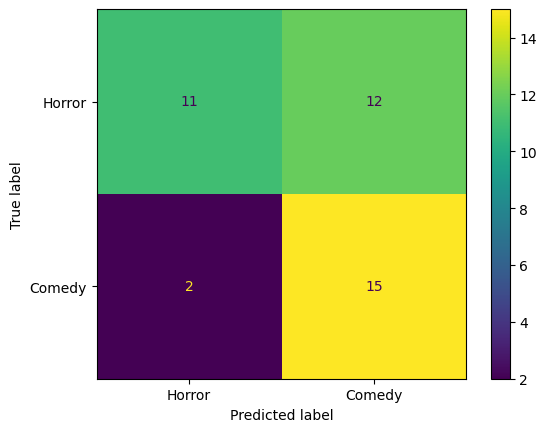

In [247]:
plot_confusion_matrix(clf, x_syntest_vectorizado, y_gentest, display_labels=['Horror','Comedy'])

Como nuestro conjunto de datos no es del tamaño deseado, la precisión no es buena pero el modelo funciona correctamente.